My name is Adrian Andhika and this is my portofolio to show you my workflow for Exploratory Data Analysis. Exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. The data i use is from kaggle about Data Scientist Salary that you can find it in the link below.
https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
raw_data = pd.read_csv('ds_salaries.csv')
raw_data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


## Preprocessing

by the data that shown, we dont need four columns to analyze which is unnamed, salary, salary currency, and employee residence. we dont need salary and salary currency because of the data was already available for converted currency in usd and we only want to analyze the region part of where the data scientist is working on so we only focus on the salary in usd data that we obtained.

on the employee residence, we didnt need the originality of the employee come from, we only need where the employee working on in this case.

In [3]:
raw_data1 = raw_data.drop(['Unnamed: 0','salary_currency', 'salary', 'employee_residence'], axis = 1)

In [4]:
raw_data1

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L
...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,100,US,M
603,2022,SE,FT,Data Engineer,126000,100,US,M
604,2022,SE,FT,Data Analyst,129000,0,US,M
605,2022,SE,FT,Data Analyst,150000,100,US,M


by the data information we can see the data didn't have null values and the total of the data is 607.

In [5]:
raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         607 non-null    int64 
 1   experience_level  607 non-null    object
 2   employment_type   607 non-null    object
 3   job_title         607 non-null    object
 4   salary_in_usd     607 non-null    int64 
 5   remote_ratio      607 non-null    int64 
 6   company_location  607 non-null    object
 7   company_size      607 non-null    object
dtypes: int64(3), object(5)
memory usage: 38.1+ KB


in describe we can see more of the detail numbers of the data.

In [6]:
raw_data1.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


In [7]:
raw_data1.isnull().count()

work_year           607
experience_level    607
employment_type     607
job_title           607
salary_in_usd       607
remote_ratio        607
company_location    607
company_size        607
dtype: int64

from here we can see types of unique value on the data

In [8]:
raw_data1.nunique()

work_year             3
experience_level      4
employment_type       4
job_title            50
salary_in_usd       369
remote_ratio          3
company_location     50
company_size          3
dtype: int64

In [9]:
raw_data1['work_year'].unique()

array([2020, 2021, 2022], dtype=int64)

In [10]:
raw_data1['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [11]:
raw_data1['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [12]:
raw_data1['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [13]:
raw_data1['remote_ratio'].unique()

array([  0,  50, 100], dtype=int64)

In [14]:
raw_data1['company_location'].unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [15]:
raw_data1['company_size'].unique()

array(['L', 'S', 'M'], dtype=object)

It looks like the data value had no duplicate information so im gonna convert the clean data into df.

In [16]:
df = raw_data1

## Exploratory Data Analysis

In [17]:
df.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,50,US,L


In [18]:
sns.set_theme(style="whitegrid")

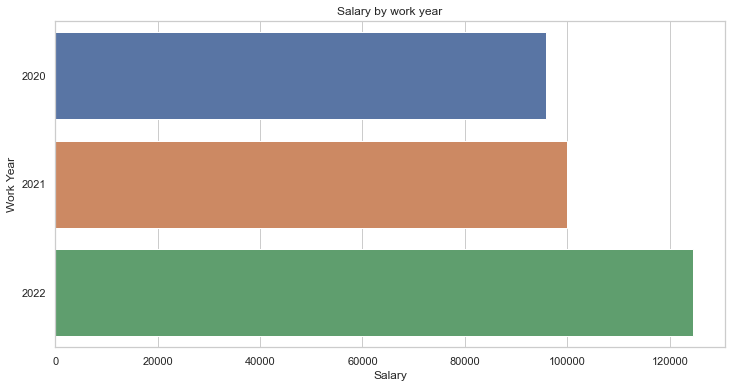

In [19]:
fig, ax = plt.subplots(figsize = (12,6))
plots = sns.barplot(data = df, y = 'work_year', x = 'salary_in_usd', ci = None, orient = 'h')
plt.ylabel('Work Year')
plt.xlabel('Salary')
plt.title('Salary by work year')
plt.show()

over the year, salary of data scientist has grown exponentionally. By this graph, there will be more growth in the next year.

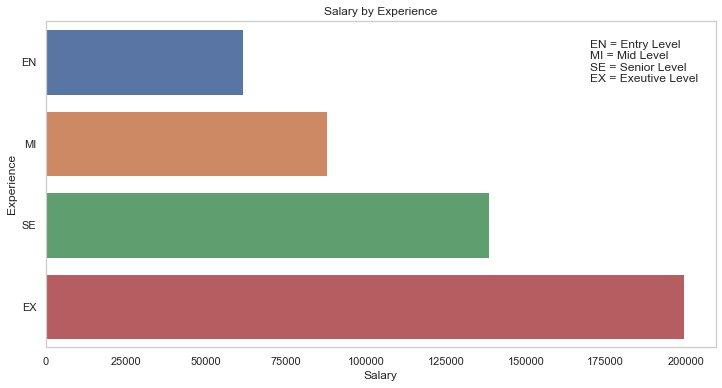

In [20]:
fig, ax = plt.subplots(figsize = (12,6))
plots = sns.barplot(data = df, y = 'experience_level', x = 'salary_in_usd', ci = None, 
                    orient = 'h', order = ['EN','MI','SE','EX'])
ax.grid(False)
plt.ylabel('Experience')
plt.xlabel('Salary')
plt.title('Salary by Experience')
plt.text(170000,0.25,"EN = Entry Level \nMI = Mid Level \nSE = Senior Level \nEX = Exeutive Level")
plt.show()

by the graph, the more experience you are on the data scientist, the more salary you will get.

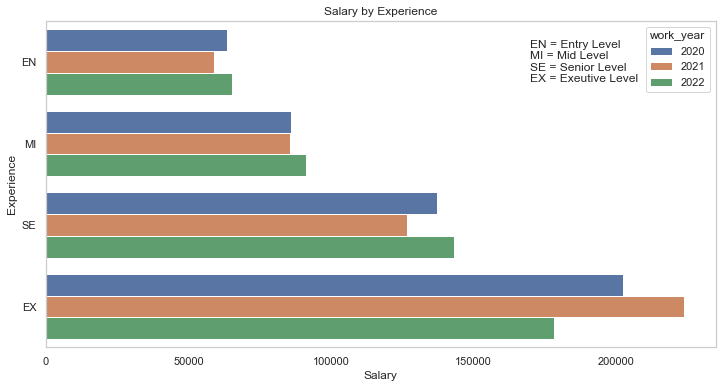

In [21]:
fig, ax = plt.subplots(figsize = (12,6))
plots = sns.barplot(data = df, y = 'experience_level', x = 'salary_in_usd', ci = None, 
                    orient = 'h', order = ['EN','MI','SE','EX'], hue = 'work_year')
ax.grid(False)
plt.ylabel('Experience')
plt.xlabel('Salary')
plt.title('Salary by Experience')
plt.text(170000,0.25,"EN = Entry Level \nMI = Mid Level \nSE = Senior Level \nEX = Exeutive Level")
plt.show()

if we compared it per year, we dont see any pattern the more year goes on.

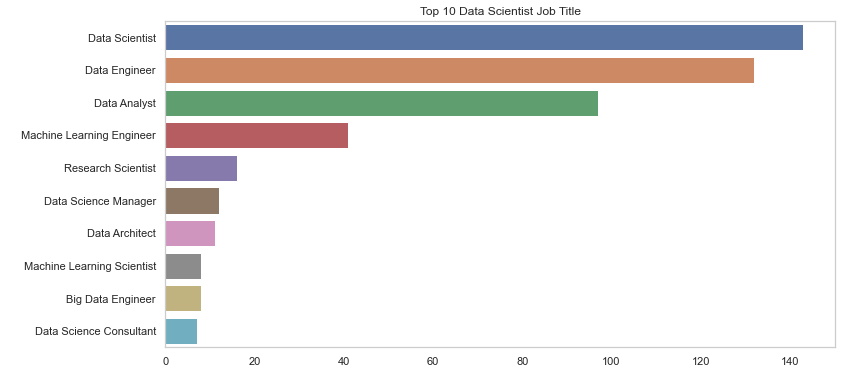

In [22]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(y='job_title', data = df, order=df.job_title.value_counts().iloc[:10].index)
ax.grid(False)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title('Top 10 Data Scientist Job Title')
plt.show()

In this top 10 data scientist job title, we see most of people in the data scientist field are in data scientist, data engineer, and data analyst.

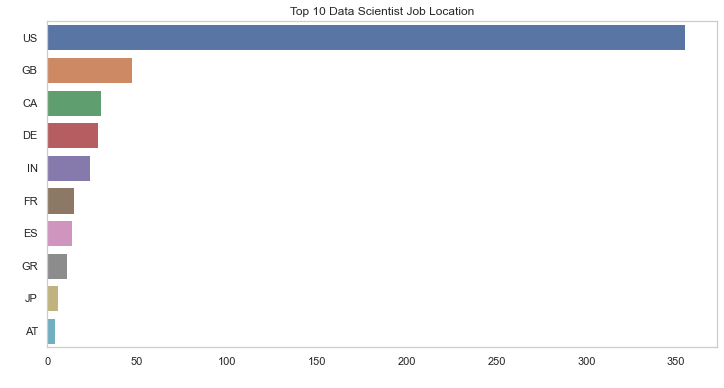

In [23]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(y='company_location', data = df, order=df.company_location.value_counts().iloc[:10].index)
ax.grid(False)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title('Top 10 Data Scientist Job Location')
plt.show()

Based on location, most data scientist in the data was in the US with a major lead compare with the rest.

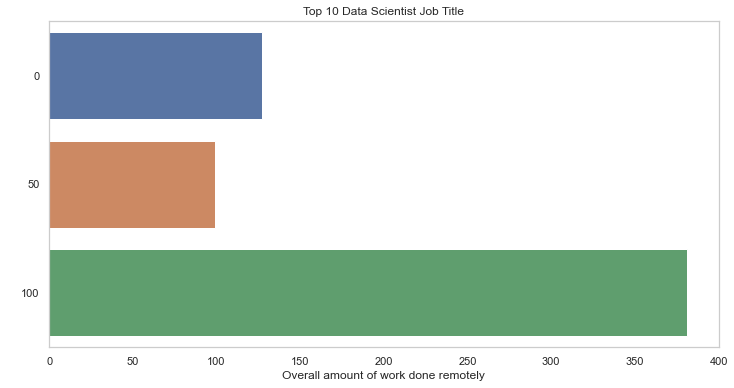

In [24]:
fig, ax = plt.subplots(figsize = (12,6))
sns.countplot(y='remote_ratio', data = df)
ax.grid(False)
plt.ylabel(' ')
plt.xlabel('Overall amount of work done remotely')
plt.title('Top 10 Data Scientist Job Title')
plt.show()

based on the graph, most of the data scientist are doing the job remotely compared to 0% and 50%.